In [1]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import multiprocessing as mp
import warnings
warnings.filterwarnings('ignore')

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/91427591/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Input file
input_file = "training.1600000.processed.noemoticon.csv"
input_file2 = "corona_processed2.csv"

# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

#get English only stop words
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

# 1. Prepare Data

In [4]:
df = pd.read_csv(input_file, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)#to train the model
df2 = pd.read_csv(input_file2, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)#to apply the model for pred

In [5]:
df.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df2.head(5)

,,,,,,,,,target,ids,date,flag,user,text
NaN,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,processed,tagged
0.0,2020-05-02 16:54:00,Nisarkh74091961,NaN,0,0,0,*triple talaq ( target muslim ) *article 370 ( target muslim ) *caa nrc npr ( target muslim ) *delhi genocide ( target muslim ) *jamia students ( target muslim ) *corona virus pandemic ( target muslim)#stoptargetingmuslim,NaN,NaN,#StopTargetingMuslim,1256628013376114693,https://twitter.com/Nisarkh74091961/status/125...,tripl talaq target muslim articl target muslim...,"[('tripl', 'NN'), ('talaq', 'NN'), ('target', ..."
1.0,2020-05-02 16:53:59,GrammaGaz,NaN,0,0,0,"1,179 out of the 2,170 coronavirus patients in nigeria had no contact with known confirmed cases #topbuzz",NaN,NaN,#Topbuzz,1256628012608450560,https://twitter.com/GrammaGaz/status/125662801...,coronaviru patient nigeria contact known confi...,"[('coronaviru', 'NN'), ('patient', 'NN'), ('ni..."
2.0,2020-05-02 16:53:59,headovmetal,NaN,0,0,0,"rep. ted lieu hit anti-lockdown protesters with the hard truth about the coronavirus after 2,500 to 3,000 people gathered in huntington beach, california, to demand an end to the statewide stay-at-home order.",NaN,NaN,NaN,1256628011778150400,https://twitter.com/headovmetal/status/1256628...,ted lieu hit protest hard truth coronaviru peo...,"[('ted', 'VBN'), ('lieu', 'NN'), ('hit', 'VBN'..."
3.0,2020-05-02 16:53:59,mcwavybeatz,NaN,0,0,0,i was able to flip the kayak over and get back in and we paddled back âsoggily ever afterâ to the dock. the end. p.s if i get sick itâs not the coronavirus itâs prolly cause i inhaled the dang water outta surprise falling in.,NaN,NaN,NaN,1256628011140550656,https://twitter.com/mcwavybeatz/status/1256628...,wa abl flip kayak get back paddl back soggili ...,"[('wa', 'NN'), ('abl', 'NN'), ('flip', 'NN'), ..."


In [7]:
df_sample = df.sample(100000)
print("This is a dataframe of size: {}\nWe only use {} for illustration here".format(len(df), len(df_sample)))

This is a dataframe of size: 1600000
We only use 100000 for illustration here


In [8]:
df_sample.head(5)

,target,ids,date,flag,user,text
1587303,4,2190924355,Tue Jun 16 04:05:22 PDT 2009,NO_QUERY,varunkhanduja,@antistatica wow when I saw english on your tw...
792361,0,2326253021,Thu Jun 25 06:46:38 PDT 2009,NO_QUERY,jonscovergirl,@krapposelli I know!!!!
823529,4,1556012253,Sat Apr 18 21:21:53 PDT 2009,NO_QUERY,mikeyloops,@Kennedia DUH! aww that sounds like a good da...
1186274,4,1982925083,Sun May 31 12:10:07 PDT 2009,NO_QUERY,jrkgirlnla,@ebassman sweet! looking forward to Full Service
1386506,4,2052841990,Sat Jun 06 02:14:08 PDT 2009,NO_QUERY,John_Taylor,"@nightwriter46 Favourite 60's band? Mmm, ther..."


In [9]:
# mapper helps to string for sentiment
map_dict = {0: "Negative", 2: "Neutral", 4: "Positive"}
def map_to_str(target):
    return map_dict[int(target)]

# preprocessing: remove unnecessary info such as links, tag other users, special chars
# param: df.text
# return bows
def preprocessing(text, stem=False):
    #first remove links, chars, users
    text = re.sub(TEXT_CLEANING_RE, " ", str(text).lower()).strip()
    tokens= []
    #remove stop w
    for t in text.split():
        if t not in stop_words:
            # remove suffix if needed
            if stem:
                tokens.append(stemmer.stem(t))
            else:
                tokens.append(t)
    return " ".join(tokens)

In [10]:
df_sample.target = df.target.apply(lambda t: map_to_str(t))
df_sample.target[:5]

1587303    Positive
792361     Negative
823529     Positive
1186274    Positive
1386506    Positive
Name: target, dtype: object

In [11]:
df_sample.text = df_sample.text.apply(lambda t: preprocessing(t))
df_sample.text[:5]

1587303    wow saw english tweet eyes glittered joy love ...
792361                                                  know
823529     duh aww sounds like good day dvd im great exci...
1186274                   sweet looking forward full service
1386506    favourite 60 band mmm many cream beatles rolli...
Name: text, dtype: object

In [12]:
df_train, df_test = train_test_split(df_sample, test_size = 1-TRAIN_SIZE, random_state=42)

# 2. Define Bayes class for Training

In [13]:
class NBClassifier(object):
    def __init__(self, df_train):
        self.df_train = df_train
        self.df_pos = df_sample.loc[df_sample.target == "Positive"]
        self.df_neg = df_sample.loc[df_sample.target == "Negative"]
        self.df_neu = df_sample.loc[df_sample.target == "Neutral"]
    
#     def count_helper(strs):
        
        
    def fit(self):
        print("-"*16+"Start fitting"+"-"*16)
        Pr_pos = self.df_pos.shape[0]/self.df_train.shape[0]
        Pr_neg = self.df_neg.shape[0]/self.df_train.shape[0]
        Pr_neu = self.df_neu.shape[0]/self.df_train.shape[0]
        self.Prior  = (Pr_pos, Pr_neg, Pr_neu)

        self.pos_words = ' '.join(self.df_pos.text.tolist()).split()
        self.neg_words = ' '.join(self.df_neg.text.tolist()).split()
        self.neu_words = ' '.join(self.df_neu.text.tolist()).split()
        
        all_words = ' '.join(self.df_train.text.tolist()).split()
        self.vocab = len(Counter(all_words))
        
        wc_pos = len(self.pos_words)
        wc_neg = len(self.neg_words)
        wc_neu = len(self.neu_words)
        self.word_count = (wc_pos, wc_neg, wc_neu)
        
        self.POS = self.word_count[0]+self.vocab
        self.NEG = self.word_count[1]+self.vocab
        self.NEU = self.word_count[2]+self.vocab
        print("-"*16+"Done fitting"+"-"*16)
        return self
    
    def posf(self, word):
        return np.log((self.pos_words.count(word)+1)/self.POS)
    def negf(self, word):
        return np.log((self.neg_words.count(word)+1)/self.NEG)
    def neuf(self, word):
        return np.log((self.neu_words.count(word)+1)/self.NEU)
    def mp_helper(self, text):
        class_choice = ['Positive', 'Negative', 'Neutral']
        words = text.split()
        info = np.asarray([[self.posf(i), self.negf(i), self.neuf(i)] for i in words])
        probability = [np.log(self.Prior[0]), np.log(self.Prior[1]), np.log(self.Prior[2])]+np.sum(info,axis=0)
        return class_choice[np.argmax(probability)]
    
    def predict(self, df_test, multiprocessing=False):
        start_time = time.time()
        if multiprocessing:
            classification = mp.Pool().map(self.mp_helper, df_test['text'].values)
        else:
            class_choice = ['Positive', 'Negative', 'Neutral']
            classification = []
            for tweet in df_test['text']:
                text = tweet.split()

                val_pos = np.array([])
                val_neg = np.array([])
                val_neu = np.array([])
                for word in text:
                    tmp_pos = np.log((self.pos_words.count(word)+1)/(self.word_count[0]+self.vocab))
                    tmp_neg = np.log((self.neg_words.count(word)+1)/(self.word_count[1]+self.vocab))
                    tmp_neu = np.log((self.neu_words.count(word)+1)/(self.word_count[2]+self.vocab))
                    val_pos = np.append(val_pos, tmp_pos)
                    val_neg = np.append(val_neg, tmp_neg)
                    val_neu = np.append(val_neu, tmp_neu)

                val_pos = np.log(self.Prior[0]) + np.sum(val_pos)
                val_neg = np.log(self.Prior[1]) + np.sum(val_neg)
                val_neu = np.log(self.Prior[2]) + np.sum(val_neu)

                probability = (val_pos, val_neg, val_neu)
                classification.append(class_choice[np.argmax(probability)])
        time_gap = (time.time() - start_time)
        print("--- %s seconds ---" % time_gap)
        return (classification, time_gap)

In [14]:
clf = NBClassifier(df_train).fit()

----------------Start fitting----------------
----------------Done fitting----------------


In [15]:
print('test size: ', len(df_test))

test size:  20000


# 3. Speedup (serial vs parallel time)

In [16]:
size = np.arange(10, 860, 10)
size

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850])

In [17]:
serial_time = []
mp_time = []
result_match = []
clf = NBClassifier(df_train).fit()
for i in size:
    sample_test = df_test.sample(i)
    print("data size: ", len(sample_test))
    WO_MP = clf.predict(sample_test, multiprocessing=False)
    W_MP = clf.predict(sample_test, multiprocessing=True)
    result_match.append(WO_MP[0] == W_MP[0])
    serial_time.append(WO_MP[1])
    mp_time.append(W_MP[1])
    

----------------Start fitting----------------
----------------Done fitting----------------
data size:  10
--- 0.7151453495025635 seconds ---
--- 5.041958332061768 seconds ---
data size:  20
--- 1.7583894729614258 seconds ---
--- 4.935853958129883 seconds ---
data size:  30
--- 3.0206172466278076 seconds ---
--- 7.618947744369507 seconds ---
data size:  40
--- 3.3553547859191895 seconds ---
--- 6.9365973472595215 seconds ---
data size:  50
--- 4.324394226074219 seconds ---
--- 6.574199199676514 seconds ---
data size:  60
--- 5.329226493835449 seconds ---
--- 7.709636926651001 seconds ---
data size:  70
--- 5.704267501831055 seconds ---
--- 7.637195348739624 seconds ---
data size:  80
--- 6.653641223907471 seconds ---
--- 8.617581605911255 seconds ---
data size:  90
--- 8.11229920387268 seconds ---
--- 8.579200744628906 seconds ---
data size:  100
--- 9.166506052017212 seconds ---
--- 8.656073331832886 seconds ---
data size:  110
--- 9.129313707351685 seconds ---
--- 9.374531030654907 se

Process ForkPoolWorker-280:
Process ForkPoolWorker-271:
Process ForkPoolWorker-62:
Process ForkPoolWorker-195:
Process ForkPoolWorker-294:
Process ForkPoolWorker-272:
Process ForkPoolWorker-100:
Process ForkPoolWorker-201:
Process ForkPoolWorker-220:
Process ForkPoolWorker-313:
Process ForkPoolWorker-101:
Process ForkPoolWorker-1:
Process ForkPoolWorker-50:
Process ForkPoolWorker-88:
Process ForkPoolWorker-45:
Process ForkPoolWorker-270:
Process ForkPoolWorker-124:
Process ForkPoolWorker-8:
Process ForkPoolWorker-218:
Process ForkPoolWorker-170:
Process ForkPoolWorker-162:
Process ForkPoolWorker-177:
Process ForkPoolWorker-339:
Process ForkPoolWorker-311:
Process ForkPoolWorker-308:
Process ForkPoolWorker-296:
Process ForkPoolWorker-30:
Process ForkPoolWorker-337:
Process ForkPoolWorker-171:
Process ForkPoolWorker-214:
Process ForkPoolWorker-107:
Process ForkPoolWorker-306:
Process ForkPoolWorker-298:
Process ForkPoolWorker-297:
Process ForkPoolWorker-163:
Process ForkPoolWorker-289:
P

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
 

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pro

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.p

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/a

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = sel

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/share/anaconda3/lib/python

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    ch

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
 

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in r

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/mul

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  Fi

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._s

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
KeyboardInterrupt
Traceback (most recent call last):
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)


  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
KeyboardInterrupt
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multi

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
  

  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3

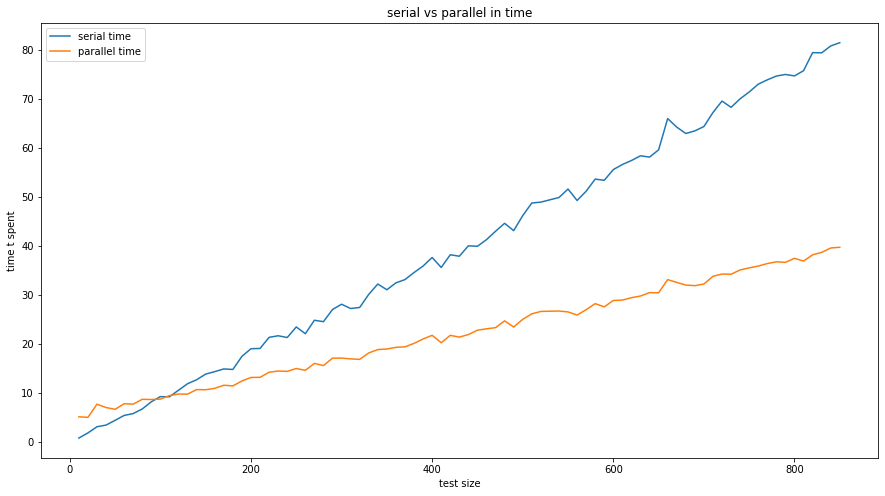

In [18]:
#plot serial and parallel time
plt.figure(figsize=(15, 8))
plt.plot(size, serial_time, label='serial time')
plt.plot(size, mp_time, label = 'parallel time')
plt.legend()
plt.xlabel('test size')
plt.ylabel('time t spent')
plt.title('serial vs parallel in time')
plt.savefig('time.png')

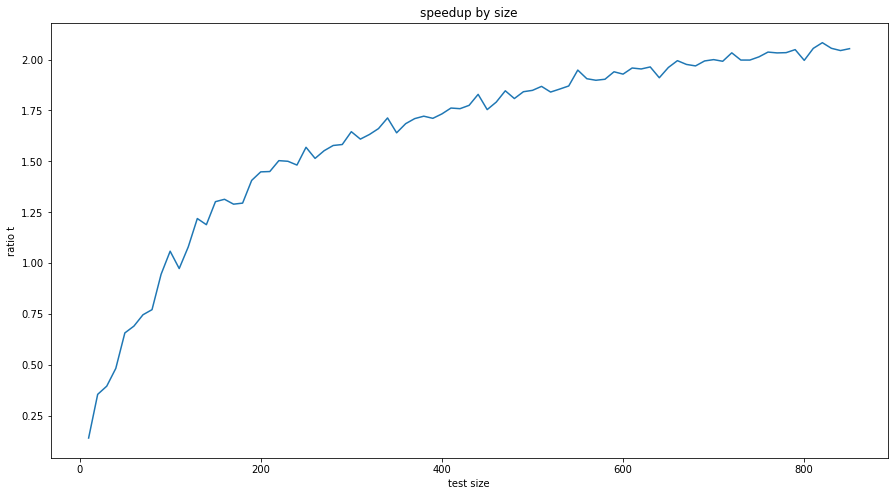

In [19]:
#calculate speedup
speedup = [i/j for i, j in zip(serial_time, mp_time)]
plt.figure(figsize=(15, 8))
plt.plot(size, speedup)
plt.xlabel('test size')
plt.ylabel('ratio t')
plt.title('speedup by size')
plt.savefig('speedup.png')

# 4. Accuracy in prediction

In [20]:
pred = clf.predict(df_test, multiprocessing=True)

--- 797.3175444602966 seconds ---


Process ForkPoolWorker-343:
Process ForkPoolWorker-342:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/share/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/usr/share/anaconda3/lib/python3.7/multi

In [21]:
pred = np.asarray(pred[0])
print("Correct prediction: ", np.count_nonzero(pred == df_test.target.values), "out of ", len(pred))
print("Accuracy: ", np.count_nonzero(pred == df_test.target.values)/len(pred))

Correct prediction:  16720 out of  20000
Accuracy:  0.836


In [30]:
s = [serial_time[i*5] for i in range(17)]
p = [mp_time[i*5] for i in range(17)]

In [36]:
pd_time = {'serial_time': s, 'parallel_time': p}
df_time = pd.DataFrame(data=pd_time)

In [37]:
df_time.style.hide_index()

serial_time,parallel_time
0.715145,5.04196
5.32923,7.70964
9.12931,9.37453
14.2629,10.8559
18.9949,13.0995
22.0009,14.526
27.1431,16.8668
32.3811,19.2166
35.5215,20.1624
41.1989,23.004


# 5. Using the model to predict new dataset

## 5.1 preprocess df2

In [24]:
df2 = pd.read_csv('corona_processed2.csv', header=None, usecols=[1,13])
new_header = ['date', 'text']
df2 = df2[1:]
df2.columns = new_header

In [25]:
df2_sample = df2.sample(2500)

In [26]:
df2_sample.isnull().sum().sum() 

2

In [27]:
df2_sample.text = df2_sample.text.apply(lambda t: preprocessing(t))
df2_sample.date = pd.to_datetime(df2_sample.date)
df2_sample['day'] = df2_sample.date.dt.day

In [28]:
df2_sample.text[:5]

9021             much proof kristin blasey ford veri littl
8330     kim jong un like thi tweet prouv aliv kimjongu...
4564     cdc equat coronaviru hospit season flu final a...
44000    trump went assert democrat media organ mock to...
58600    less percent michigan coronaviru test come bac...
Name: text, dtype: object

In [29]:
df2_sample.day[5:10]

14906    2
94112    6
67775    4
37558    8
50497    3
Name: day, dtype: int64

## 5.2 apply trained bayes model for prediction

In [30]:
pred2 = clf.predict(df2_sample, multiprocessing=True)

--- 370.8387312889099 seconds ---


In [31]:
df2_sample['target'] = pred2[0]
df2_sample.head(5)

,date,text,day,target
9021,2020-05-02 16:10:42,much proof kristin blasey ford veri littl,2,Positive
8330,2020-05-02 16:13:52,kim jong un like thi tweet prouv aliv kimjongu...,2,Negative
4564,2020-05-02 16:31:24,cdc equat coronaviru hospit season flu final a...,2,Negative
44000,2020-05-03 23:53:11,trump went assert democrat media organ mock to...,3,Positive
58600,2020-05-04 23:51:38,less percent michigan coronaviru test come bac...,4,Negative


In [32]:
# see # pos and negative per day
days = list(set(df2_sample.day))
# Pos
day_pos = []
day_neg = []
for i in days:
    vals = (df2_sample.loc[df2_sample.day == i]['target'].values == 'Positive')*1
    day_pos.append(np.count_nonzero(vals))
    day_neg.append(len(vals)-np.count_nonzero(vals))

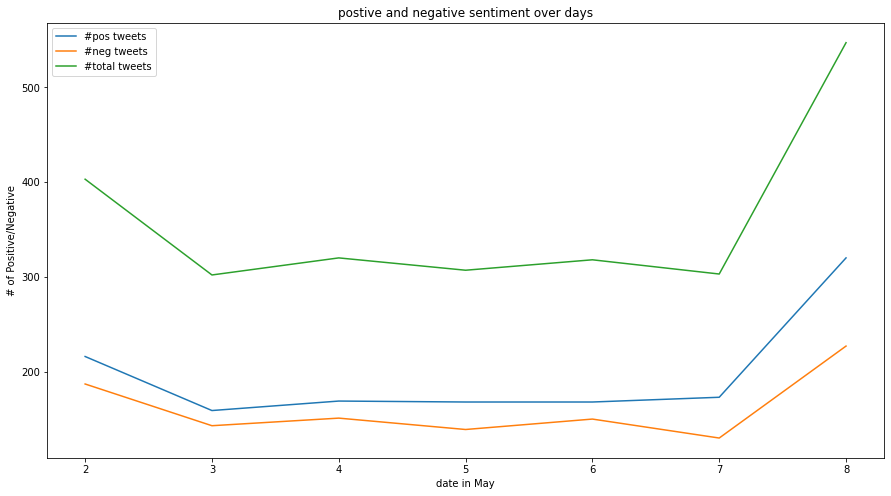

In [33]:
plt.figure(figsize=(15,8))
plt.plot(days, day_pos, label='#pos tweets')
plt.plot(days, day_neg, label='#neg tweets')
plt.plot(days, df2_sample.groupby(['day']).size().values, label='#total tweets')
plt.legend()
plt.xlabel('date in May')
plt.ylabel('# of Positive/Negative')
plt.title('postive and negative sentiment over days')
plt.savefig('sentiment.png')

In [34]:
#may be biased by #tweets on different days
df2_sample_group = {'date in May': days, '#tweets': df2_sample.groupby(['day']).size().values,\
                   'Postive': day_pos, 'Negative: ': day_neg}
df2_sample_group = pd.DataFrame(data=df2_sample_group)
df2_sample_group.style.hide_index()

date in May,#tweets,Postive,Negative:
2,403,216,187
3,302,159,143
4,320,169,151
5,307,168,139
6,318,168,150
7,303,173,130
8,547,320,227
